# Installation et imports

### Installation des modules 

In [1]:
%pip install Pandas


[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
%pip install Matplotlib 


[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
%pip install Scikit-learn


[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
%pip install Numpy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


### Import et données

In [6]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib as plt
import math


In [7]:
data = pd.read_csv("../dfClean.csv")

counts = data['descr_grav'].value_counts()

total_0 = counts[0]/len(data)
total_1 = counts[1]/len(data)
total_2 = counts[2]/len(data)
total_3 = counts[3]/len(data)

Proportion_0 = data[data['descr_grav'] == 0].sample(n=int(7500*total_0))
Proportion_1 = data[data['descr_grav'] == 1].sample(n=int(7500*total_1))
Proportion_2 = data[data['descr_grav'] == 2].sample(n=int(7500*total_2))
Proportion_3 = data[data['descr_grav'] == 3].sample(n=int(7500*total_3))

data_reduit = pd.concat([Proportion_0,Proportion_1, Proportion_2, Proportion_3])
data_reduit = data_reduit.reset_index(drop=True)
print(len(data_reduit))
display(data_reduit)

7498


,date,latitude,longitude,descr_cat_veh,descr_agglo,place,descr_dispo_secu,descr_grav
0,7266,48.8925,2.344400,0,0,0,14,0
1,10329,48.6000,2.116670,1,1,0,14,0
2,27098,47.2167,-1.550000,0,0,0,7,0
3,4887,48.5333,2.666670,0,1,2,14,0
4,6206,50.7167,3.150000,0,0,0,8,0
...,...,...,...,...,...,...,...,...
7493,23081,44.9500,5.716670,2,1,0,11,3
7494,120,47.2000,-1.566670,0,0,0,14,3
7495,827,48.1333,-1.000000,0,1,0,14,3
7496,18619,47.2000,-0.283333,0,0,0,14,3


# Répartition des données

### Répartition holdout 

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
def holdout(dataframe, colonne_predict, num_rep, train_s, test_s ):
        liste_data_train_test = []
        liste_data = []
        clean_data = dataframe.drop(colonne_predict, axis = 1)
        y = dataframe[colonne_predict]
        for i in range(num_rep):
                X_train, X_test, y_train, y_test = train_test_split(clean_data,y, train_size= train_s, test_size = test_s)
                X_train = X_train.reset_index(drop=True)
                y_train = y_train.reset_index(drop=True)
                X_test = X_test.reset_index(drop=True)
                y_test = y_test.reset_index(drop=True)
                liste_data_train_test.append([X_train, X_test, y_train, y_test])
        return liste_data_train_test

### Répartition Leave One Out

In [10]:
from sklearn.model_selection import LeaveOneOut
from sklearn.neighbors import KNeighborsClassifier

In [11]:
def leaveoneout(dataframe, colonne_predict,k):
    liste_y_pred = []
    liste_y_test = []
    X = dataframe.drop(colonne_predict, axis = 1) 
    y = dataframe[colonne_predict]
    LOO = LeaveOneOut()
    knn = KNeighborsClassifier(n_neighbors=k)
    
    for train_index, test_index in (LOO.split(X)):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        liste_y_pred.append(y_pred)
        liste_y_test.append(y_test)
        
    return liste_y_pred, liste_y_test

# Classification avec KNN

### Fonctions from scratch

In [12]:
#Fonction de classification knn
def KnnClassification_distance_euclidienne(ligne,y_train,df,k):
    dictList = [None] * len(df)
    liste_y_pred = []
    for index, row in df.iterrows():
        dictList[index] = np.linalg.norm(ligne - row) #calcul de la distance euclidienne
    
    sorted_values = sorted(enumerate(dictList), key=lambda x: x[1])[:k]
    for index,value in sorted_values:
        #firstk.append([df.loc[index]])
        liste_y_pred.append(y_train[index])
    
    y_pred = np.bincount(liste_y_pred).argmax()
        
    return y_pred

In [13]:
#Fonction de classification knn
def KnnClassification_distance_manhattan(ligne, y_train, df, k):
    dictList = [None] * len(df)
    liste_y_pred = []
    
    for index, row in df.iterrows():
        dictList[index] = np.sum(np.abs(ligne - row))  # Calcul de la distance de Manhattan
    
    sorted_values = sorted(enumerate(dictList), key=lambda x: x[1])[:k]
    
    for index, value in sorted_values:
        liste_y_pred.append(y_train[index])
    
    y_pred = np.bincount(liste_y_pred).argmax()
        
    return y_pred

In [14]:
def KnnClassification_distance_sup_norme(ligne, y_train, df, k):
    dictList = [None] * len(df)
    liste_y_pred = []
    
    for index, row in df.iterrows():
        dictList[index] = np.max(np.abs(ligne - row))  # Calcul de la distance de la norme supérieure
    
    sorted_values = sorted(enumerate(dictList), key=lambda x: x[1])[:k]
    
    for index, value in sorted_values:
        liste_y_pred.append(y_train[index])
    
    y_pred = np.bincount(liste_y_pred).argmax()
        
    return y_pred

### Scikit learn

In [15]:
#prediction holdout sklearn
def  KnnClassification_sk_learn(liste_data):
    knn = KNeighborsClassifier(n_neighbors=5)
    liste_y_pred_holdout_sk = []
    liste_y_test_holdout_sk = []
    for i in range(len(liste_data)):
        X_train = liste_data[i][0]
        X_test = liste_data[i][1]
        y_test = liste_data[i][3]
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        liste_y_pred_holdout_sk.append(y_pred)
        liste_y_test_holdout_sk.append(y_test)
    return liste_y_pred_holdout_sk, liste_y_test_holdout_sk

### Calcul de score

In [16]:
from sklearn.metrics import accuracy_score

In [17]:
#Répartition leave One Out
y_pred_LOO_5, y_test_LOO_5 = leaveoneout(data_reduit, "descr_grav", 5)
y_pred_LOO_7, y_test_LOO_7 = leaveoneout(data_reduit, "descr_grav", 7)
y_pred_LOO_10, y_test_LOO_10 = leaveoneout(data_reduit, "descr_grav", 10)

KeyboardInterrupt: 

In [ ]:
# Score répartition leave One Out
accuracy_LOO_5 = accuracy_score(y_test_LOO_5, y_pred_LOO_5)
accuracy_LOO_7 = accuracy_score(y_test_LOO_7, y_pred_LOO_7)
accuracy_LOO_10 = accuracy_score(y_test_LOO_10, y_pred_LOO_10)

print(accuracy_LOO_5*100)
print(accuracy_LOO_7*100)
print(accuracy_LOO_10*100)

NameError: name 'y_test_LOO_5' is not defined

In [ ]:
#Répartition hold out
liste_data_holdout = []
#data_test = data.drop(columns=["latitude", "longitude"])
data_test = data_reduit
liste_data_holdout  = holdout(data_reduit,"descr_grav", 5, 0.8, 0.2)

# Prediction holdout from scratch
liste_y_pred_holdout_LOO_euclidienne = []
liste_y_pred_holdout_LOO_manhattan = []
liste_y_pred_holdout_LOO_sup_norme = []


X_test_0 = liste_data_holdout[0][1]
y_train_0  = liste_data_holdout[0][2]
X_train_0 = liste_data_holdout[0][0]
y_test_0 =  liste_data_holdout[0][3]

for i in range(len(X_test)):
    y_pred_holdout_sup_norme = KnnClassification_distance_sup_norme(X_test.loc[i], y_train, X_train, 5)
    liste_y_pred_holdout_LOO_sup_norme.append(y_pred_holdout_sup_norme)
    y_pred_holdout_euclidienne = KnnClassification_distance_euclidienne(X_test.loc[i], y_train, X_train, 5)
    liste_y_pred_holdout_LOO_euclidienne.append(y_pred_holdout_euclidienne)
    y_pred_holdout_manhattan = KnnClassification_distance_manhattan(X_test.loc[i], y_train, X_train, 5)
    liste_y_pred_holdout_LOO_manhattan.append(y_pred_holdout_manhattan)

for i in range(len(X_test)):
    y_pred_holdout_sup_norme = KnnClassification_distance_sup_norme(X_test.loc[i], y_train, X_train, 7)
    liste_y_pred_holdout_LOO_sup_norme.append(y_pred_holdout_sup_norme)
    y_pred_holdout_euclidienne = KnnClassification_distance_euclidienne(X_test.loc[i], y_train, X_train, 7)
    liste_y_pred_holdout_LOO_euclidienne.append(y_pred_holdout_euclidienne)
    y_pred_holdout_manhattan = KnnClassification_distance_manhattan(X_test.loc[i], y_train, X_train, 7)
    liste_y_pred_holdout_LOO_manhattan.append(y_pred_holdout_manhattan)

for i in range(len(X_test)):
    y_pred_holdout_sup_norme = KnnClassification_distance_sup_norme(X_test.loc[i], y_train, X_train, 10)
    liste_y_pred_holdout_LOO_sup_norme.append(y_pred_holdout_sup_norme)
    y_pred_holdout_euclidienne = KnnClassification_distance_euclidienne(X_test.loc[i], y_train, X_train, 10)
    liste_y_pred_holdout_LOO_euclidienne.append(y_pred_holdout_euclidienne)
    y_pred_holdout_manhattan = KnnClassification_distance_manhattan(X_test.loc[i], y_train, X_train, 10)
    liste_y_pred_holdout_LOO_manhattan.append(y_pred_holdout_manhattan)


NameError: name 'X_test' is not defined

In [ ]:
# Score répartition leave One Out
accuracy_holdout_euclidienne = accuracy_score(y_test_0, liste_y_pred_holdout_LOO_euclidienne)
accuracy_holdout_manhattan = accuracy_score(y_test_0, liste_y_pred_holdout_LOO_manhattan)
accuracy_holdout_sup_norme = accuracy_score(y_test_0, liste_y_pred_holdout_LOO_sup_norme)

print("Score euclidienne:" accuracy_holdout_euclidienne*100)
print("Score manhattan:" accuracy_holdout_manhattan*100)
print("Score sup norme:" accuracy_holdout_sup_norme*100)

SyntaxError: invalid syntax. Perhaps you forgot a comma? (149622622.py, line 6)

In [ ]:
#Score prediction holdout scikit learn
#for i in range(len(liste_y_pred_holdout_sk)):
liste_y_pred_holdout_sk, liste_y_test_holdout_sk = KnnClassification_sk_learn(liste_data_holdout)
accuracy_holdout_sk = accuracy_score(liste_y_test_holdout_sk, liste_y_pred_holdout_sk)

# Classification avec trois algo "haut niveau"

### la partie d'apres mais qui doit etre avant si on veut pourvoir l'appeler

In [1]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
import numpy as np

In [2]:
def evaluation(objet, X, Y):
    #calcul taux de classification
    taux_classification = cross_val_score(objet, X, Y, scoring='accuracy')
    #Moyenne taux de classification
    moyenne_taux_classification = np.mean(taux_classification)
    #prédiction 
    Y_pred = cross_val_predict(objet, X, Y)
    #Calcul du score (taux d'apprentissage)
    accuracy = accuracy_score(Y, Y_pred)
    # Matrice de confusion à partir des classes réelle et celles prédites
    matrice_confusion = ConfusionMatrixDisplay.from_predictions(Y, Y_pred, normalize="true",  values_format=".0%") #résultat en pourcentage
    # Précision du modèle
    precision = precision_score(Y, Y_pred, average='weighted',zero_division=1)
    # Rappel du modèle
    rappel = recall_score(Y, Y_pred, average='weighted')

    return taux_classification, moyenne_taux_classification, Y_pred, accuracy, matrice_confusion, precision, rappel



### Les modèles

SVM

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
import joblib

In [8]:
import pandas as pd
from sklearn.utils import resample

# Load the original DataFrame
df = pd.read_csv("../dfClean.csv")

# Sample a portion of the DataFrame
df_sampled = df.sample(frac=0.20, random_state=16)
df_sampled.reset_index(drop=True, inplace=True)

# Separate the feature columns and the target column
feature_columns = df_sampled.columns.drop('descr_grav')
target_column = 'descr_grav'
X = df_sampled[feature_columns]
y = df_sampled[target_column]

# Separate the data by target classes
class_0 = df_sampled[df_sampled['descr_grav'] == 0]
class_1 = df_sampled[df_sampled['descr_grav'] == 1]
class_2 = df_sampled[df_sampled['descr_grav'] == 2]
class_3 = df_sampled[df_sampled['descr_grav'] == 3]

# Determine the smallest class size
min_samples = min(len(class_0), len(class_1), len(class_2), len(class_3))

# Resample the data to balance the classes
class_0_resampled = resample(class_0, replace=False, n_samples=min_samples, random_state=42)
class_1_resampled = resample(class_1, replace=False, n_samples=min_samples, random_state=42)
class_2_resampled = resample(class_2, replace=False, n_samples=min_samples, random_state=42)
class_3_resampled = resample(class_3, replace=False, n_samples=min_samples, random_state=42)

# Concatenate the resampled classes into a new balanced DataFrame
df_balanced = pd.concat([class_0_resampled, class_1_resampled, class_2_resampled, class_3_resampled])

# Shuffle the rows of the balanced DataFrame
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

# Separate the balanced data into feature and target columns
X = df_balanced[feature_columns]
y = df_balanced[target_column]


In [9]:

# on définit les paramètres de gridsearch
param_grid = {
    'C': [0.1, 1,10],
    'kernel': ['rbf'],
    'gamma': [0.1, 0.5, 1]
}

# on crée le SVC identifieur
svm = SVC()

#on crée l'objet gridsearch
grid_search = GridSearchCV(svm, param_grid, scoring='accuracy')


# on fait fit la gridsearch sur le modele
#on définit le jeu de test et de train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=16)
grid_search.fit(X_train, y_train)
best_params_svm = grid_search.best_params_
print(best_params_svm)

# on entraine un nouveau SVC avec les meilleurs paramètres défini avant
best_svm = SVC(**best_params_svm)
best_svm.fit(X_train, y_train)
#on sauvgarde le modele
joblib.dump(best_svm,"../models/modelSVC.pkl")



{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}


['../models/modelSVC.pkl']

on evalue le modele

{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
accuracy  of the model : 0.25833333333333336


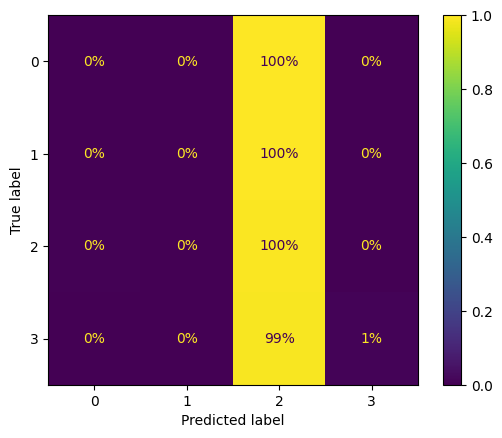

In [7]:
import matplotlib.pyplot  as plt
model = joblib.load("../models/modelSVC.pkl")
best_params_svm = grid_search.best_params_
print(best_params_svm)
acc = evaluation(model,X_test,y_test)
print(f"accuracy  of the model : {acc[3]}")

Random Forest

In [7]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.utils import resample

import joblib

In [11]:
import pandas as pd
from sklearn.utils import resample

# Load the original DataFrame
df = pd.read_csv("../dfClean.csv")

# Sample a portion of the DataFrame
df_sampled = df.sample(frac=0.80, random_state=16)
df_sampled.reset_index(drop=True, inplace=True)

# Separate the feature columns and the target column
feature_columns = df_sampled.columns.drop('descr_grav')
target_column = 'descr_grav'
X = df_sampled[feature_columns]
y = df_sampled[target_column]

# Separate the data by target classes
class_0 = df_sampled[df_sampled['descr_grav'] == 0]
class_1 = df_sampled[df_sampled['descr_grav'] == 1]
class_2 = df_sampled[df_sampled['descr_grav'] == 2]
class_3 = df_sampled[df_sampled['descr_grav'] == 3]

# Determine the smallest class size
min_samples = min(len(class_0), len(class_1), len(class_2), len(class_3))

# Resample the data to balance the classes
class_0_resampled = resample(class_0, replace=False, n_samples=min_samples, random_state=42)
class_1_resampled = resample(class_1, replace=False, n_samples=min_samples, random_state=42)
class_2_resampled = resample(class_2, replace=False, n_samples=min_samples, random_state=42)
class_3_resampled = resample(class_3, replace=False, n_samples=min_samples, random_state=42)

# Concatenate the resampled classes into a new balanced DataFrame
df_balanced = pd.concat([class_0_resampled, class_1_resampled, class_2_resampled, class_3_resampled])

# Shuffle the rows of the balanced DataFrame
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

# Separate the balanced data into feature and target columns
X = df_balanced[feature_columns]
y = df_balanced[target_column]


In [12]:


#on récupere le df, et on le partitionne pour l'entrainement


# Load the original DataFrame

#on définit le jeu de test et de train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=16)

#on crée une instance randomforest
rf = RandomForestClassifier()

# on définit les paramètres de gridsearch
param_grid = {
    'n_estimators': [50, 100, 200,500],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

#on crée l'objet gridsearch
grid_search = GridSearchCV(rf, param_grid, scoring='accuracy')

#etape de l'entrainement fitting c'est la que c'est long
grid_search.fit(X_train, y_train)

#on recupere les meilleurs param et le meilleur score
best_params = grid_search.best_params_
print(best_params)
best_score = grid_search.best_score_

#on reentraine un modele avec les meilleurs parametres
best_rf = RandomForestClassifier(**best_params)
best_rf.fit(X_train, y_train)



#on sauvegarde le modele
joblib.dump(best_rf,"../models/modelRF.pkl")

{'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 200}


['../models/modelRF.pkl']

on évalue le modele

accuracy  of the model : 0.47409126063418405


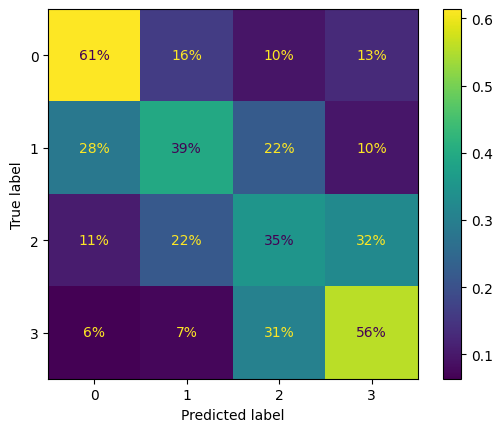

In [13]:
import matplotlib.pyplot  as plt
model = joblib.load("../models/modelRF.pkl")
acc = evaluation(model,X_test,y_test)
print(f"accuracy  of the model : {acc[3]}")

MultilayerPerceptron (MLP)

In [12]:
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
import joblib

In [13]:
import pandas as pd
from sklearn.utils import resample

# Load the original DataFrame
df = pd.read_csv("../dfClean.csv")

# Sample a portion of the DataFrame
df_sampled = df.sample(frac=0.80, random_state=16)
df_sampled.reset_index(drop=True, inplace=True)

# Separate the feature columns and the target column
feature_columns = df_sampled.columns.drop('descr_grav')
target_column = 'descr_grav'
X = df_sampled[feature_columns]
y = df_sampled[target_column]

# Separate the data by target classes
class_0 = df_sampled[df_sampled['descr_grav'] == 0]
class_1 = df_sampled[df_sampled['descr_grav'] == 1]
class_2 = df_sampled[df_sampled['descr_grav'] == 2]
class_3 = df_sampled[df_sampled['descr_grav'] == 3]

# Determine the smallest class size
min_samples = min(len(class_0), len(class_1), len(class_2), len(class_3))

# Resample the data to balance the classes
class_0_resampled = resample(class_0, replace=False, n_samples=min_samples, random_state=42)
class_1_resampled = resample(class_1, replace=False, n_samples=min_samples, random_state=42)
class_2_resampled = resample(class_2, replace=False, n_samples=min_samples, random_state=42)
class_3_resampled = resample(class_3, replace=False, n_samples=min_samples, random_state=42)

# Concatenate the resampled classes into a new balanced DataFrame
df_balanced = pd.concat([class_0_resampled, class_1_resampled, class_2_resampled, class_3_resampled])

# Shuffle the rows of the balanced DataFrame
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

# Separate the balanced data into feature and target columns
X = df_balanced[feature_columns]
y = df_balanced[target_column]


In [14]:


#separer les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=16)

# init le classifieur MLP
mlp = MLPClassifier()

# definir les parametres de gridsearch
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (200,)],
    'activation': ['relu', 'tanh', 'logistic'],
    'alpha': [0.0001, 0.001, 0.01]
}

# créer un objet GridSearchCV
grid_search = GridSearchCV(mlp, param_grid, scoring='accuracy')

# entrainement ( fitting )
grid_search.fit(X_train, y_train)

# on recupere les meilleurs paramètres et le meilleur score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# on entraine le nouveau modèle MLP avec les meilleurs paramètres
best_mlp = MLPClassifier(**best_params)
best_mlp.fit(X_train, y_train)

# evaluation du nouveau modèle
accuracy = best_mlp.score(X_test, y_test)

print(accuracy)

#on le sauvegarde
joblib.dump(best_mlp,"../models/modelMLP.pkl")

0.23201856148491878


['../models/modelMLP.pkl']

on évalue le modèle

accuracy  of the model : 0.2590873936581593


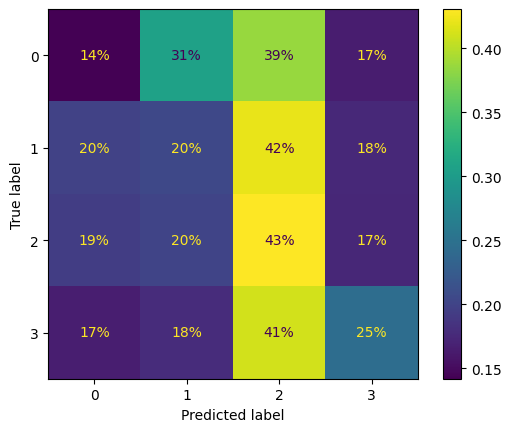

In [15]:
import matplotlib.pyplot  as plt
model = joblib.load("../models/modelMLP.pkl")
acc = evaluation(model,X_test,y_test)
print(f"accuracy  of the model : {acc[3]}")

Modele FUSION

In [16]:
from sklearn.ensemble import VotingClassifier
import joblib

In [17]:
model_1 = joblib.load("../models/modelMLP.pkl")
model_2 = joblib.load("../models/modelRF.pkl")
model_3 = joblib.load("../models/modelSVC.pkl")

df = pd.read_csv("../dfClean.csv")
df.reset_index(drop=True, inplace=True)  



feature_columns = df.columns.drop('descr_grav')
target_column = 'descr_grav'

X = df[feature_columns]
y = df[target_column]

#separer les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=16)


model_4 = VotingClassifier([('MLP',model_1),
     ('RandFor',model_2),
     ('SVC',model_3)],
     voting='hard')

listScore = []

for model in (model_1,model_2,model_3,model_4):
    model.fit(X_train,y_train)
    listScore.append([model.__class__.__name__,model.score(X_test,y_test) ])

joblib.dump(best_mlp,"../models/modelVote.pkl")


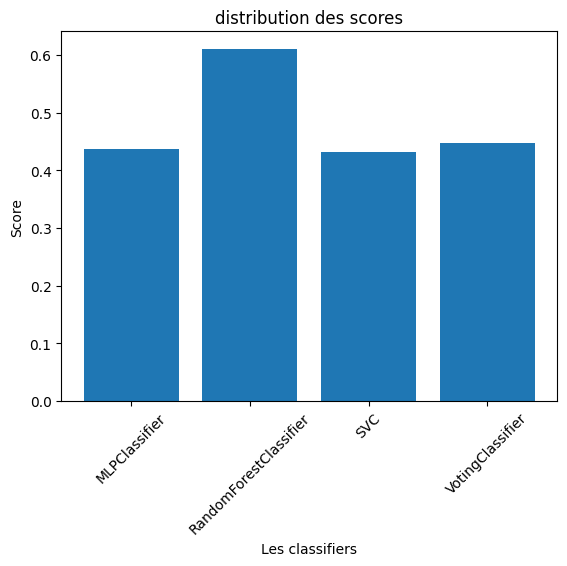

In [ ]:
names = [item[0] for item in listScore]
values = [item[1] for item in listScore]

plt.bar(names, values)
plt.xlabel('Les classifiers')
plt.ylabel('Score')
plt.title('distribution des scores')


plt.xticks(rotation=45)


plt.show()

In [ ]:
import matplotlib.pyplot  as plt
import joblib
model = joblib.load("../models/modelVote.pkl")
acc = evaluation(model,X_test,y_test)
print(f"accuracy  of the model : {acc[3]}")

NameError: name 'X_test' is not defined